# Álgebra Lineal

In [1]:
# %pylab inline
# from IPython.display import Image
# from IPython.display import HTML
import numpy as np
import matplotlib.pylab as plt

In [1]:
help(np.linalg)

## Matrices en NumPy

In [3]:
A=np.zeros((3,3))
print(type(A))
mA=np.mat(A)
print(mA)
print(type(mA))
B=np.eye(3)
mB=np.mat(B)
print(mB)
# El producto entre arrays se hace elemento por elemento
# El producto entre matrices obedece las reglas de la multiplicación matricial
mC=mA*mB
print(mC)

<class 'numpy.ndarray'>
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
<class 'numpy.matrix'>
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Definición del producto de dos matrices

$$(AB)_{i,j}=\sum A_{i,k}B_{k,j}$$

## Ejemplo: matrices de Pauli

$$\sigma_x = \begin{bmatrix}0 & 1\\ 1 & 0 \end{bmatrix}, \quad \sigma_y = \begin{bmatrix}0 & -i\\ i & 0 \end{bmatrix}, \quad \sigma_z = \begin{bmatrix}1 & 0\\ 0 & -1 \end{bmatrix}$$

In [5]:
sigmax=np.matrix([[0,1],[1,0]])
sigmay=np.matrix([[0,-1j],[1j,0]])
sigmaz=np.matrix([[1,0],[0,-1]])
sigmas=[sigmax,sigmay,sigmaz]

sigmax, sigmay, sigmaz

(matrix([[0, 1],
         [1, 0]]),
 matrix([[ 0.+0.j, -0.-1.j],
         [ 0.+1.j,  0.+0.j]]),
 matrix([[ 1,  0],
         [ 0, -1]]))

"The matrices are involutory:..."

In [6]:
for pauli in sigmas:
    print("*"*20)
    print(pauli*pauli)
    print("*"*20)

********************
[[1 0]
 [0 1]]
********************
********************
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
********************
********************
[[1 0]
 [0 1]]
********************


## Eigenvectors and Eigenvalues

Valores y vectores propios se calculan con la función **eig**.

In [7]:
for i in range(3):
    print("*"*22,"σ"+["x","y","z"][i],"*"*22)
    print(np.linalg.eig(sigmas[i]))
    print("*"*48)

********************** σx **********************
(array([ 1., -1.]), matrix([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))
************************************************
********************** σy **********************
(array([ 1.+0.j, -1.+0.j]), matrix([[-0.        -0.70710678j,  0.70710678+0.j        ],
        [ 0.70710678+0.j        ,  0.        -0.70710678j]]))
************************************************
********************** σz **********************
(array([ 1., -1.]), matrix([[1., 0.],
        [0., 1.]]))
************************************************


In [ ]:
help(np.linalg)

Los determinantes se calculan con la función **det** que admite matrices o arrays cuadrados

In [8]:
for pauli in sigmas:
    print(np.linalg.det(pauli))

-1.0
(-1+0j)
-1.0


La traza se calcula con la función **trace**

In [9]:
for pauli in sigmas:
    print(np.trace(pauli))

0
0j
0


## Ejemplo: Density Matrices

Density Matrices are Hermitian, Trace 1, and Positive Definite

$$\rho = \frac{1}{4}\begin{bmatrix}
2 & 1 & 1\\
1 & 1 & 0\\
1 & 0 & 1 
\end{bmatrix}$$

In [23]:
rho = (0.25)*np.array([[2, 1, 1],[1, 1, 0],[1, 0, 1]])

rho

array([[0.5 , 0.25, 0.25],
       [0.25, 0.25, 0.  ],
       [0.25, 0.  , 0.25]])

In [25]:
D, U = np.linalg.eig(rho)

D

array([ 7.5000000e-01, -7.2858386e-17,  2.5000000e-01])

In [26]:
U

array([[-8.16496581e-01, -5.77350269e-01, -1.57009246e-16],
       [-4.08248290e-01,  5.77350269e-01, -7.07106781e-01],
       [-4.08248290e-01,  5.77350269e-01,  7.07106781e-01]])

In [27]:
rho @ U[:, 0], D[0] * U[:, 0]

(array([-0.61237244, -0.30618622, -0.30618622]),
 array([-0.61237244, -0.30618622, -0.30618622]))

Unitary Matrix

$$ UU^{\text{T}}=I$$

In [28]:
U @ U.T

array([[ 1.00000000e+00,  1.11022302e-16, -1.11022302e-16],
       [ 1.11022302e-16,  1.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16,  0.00000000e+00,  1.00000000e+00]])

Spectral Decomposition

$$ \rho = UDU^{\text{T}}$$

In [29]:
U @ np.diag(D) @ U.T

array([[ 5.00000000e-01,  2.50000000e-01,  2.50000000e-01],
       [ 2.50000000e-01,  2.50000000e-01, -4.16333634e-17],
       [ 2.50000000e-01, -6.93889390e-17,  2.50000000e-01]])

## Solución de sistemas de ecuaciones lineales

Para resolver sistemas de ecuaciones lineales usar la función **solve**.

$$A\vec{b}=\vec{c} \rightarrow \vec{b}=A^{-1}\vec{c}$$

$$ 3x_1 - 7x_2 + 4x_3 = 10 $$
$$ 1x_1 - 2x_2 + x_3 = 3 $$
$$ 2x_1 - 1x_2 - 2x_3 = 6 $$

$$\begin{bmatrix}
3 & -7 & 4\\
1 & -2 & 1\\
2 & -1 & -2 
\end{bmatrix}\begin{bmatrix}
x_1\\
x_2\\
x_3\end{bmatrix} = \begin{bmatrix}
10\\
3\\
6\end{bmatrix} $$

In [10]:
mat=np.matrix([[3,-7,4],[1,-2,1],[2,-1,-2]])
sol=np.linalg.solve(mat,[10,3,6])
print(sol)
print('')
print("Verificar la solución")
mat*np.matrix(sol).T

[-2. -4. -3.]

Verificar la solución


matrix([[10.],
        [ 3.],
        [ 6.]])

También podría usarse la inversión de matrices que se puede llevar a cabo con la función **inv**.

In [ ]:
np.linalg.inv(mat)*np.transpose(np.matrix([[10,3,6]]))

In [11]:
np.linalg.inv(mat)

matrix([[-5., 18., -1.],
        [-4., 14., -1.],
        [-3., 11., -1.]])

## Otros

La función **eye** sirve para producir un "array identidad".

In [12]:
identidad=np.matrix(np.eye(10))
print(identidad)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


La función **diag** se puede utilizar para tomar la diagonal de un array o bandas.

In [13]:
ma=np.diag(range(10))
print(ma)

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 9]]


In [14]:
# Recuperar la diagonal
np.diag(ma)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
# Usar una diagonal distinta a la principal
np.diag(range(10),k=1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

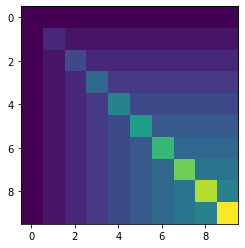

In [16]:
ma=np.zeros((10,10))
# La función transpose puede utilizarse para transponer arrays o matrices.
for i in range(10):
    ma+=np.diag(range(10-i),k=i)+np.transpose(np.diag(range(10-i),k=i))
plt.figure()
plt.imshow(ma,interpolation='none')
plt.show()

## Exercise

Dados tres puntos en el plano cartesiano, encuentre la ecuación (como un string) del circulo que pasa exactamente por esos tres puntos. 

$$ (x-x_0)^2+(y-y_0)^2=r^2 $$

In [17]:
import numpy as np

data1 = "(9,8),(9,4),(3,6)"
data2 = "(7,3),(9,6),(3,6)"

def circle(data):
    
    x_1, y_1 = int(data[1]), int(data[3])
    x_2, y_2 = int(data[7]), int(data[9])
    x_3, y_3 = int(data[13]), int(data[15])
    
    A = np.array([ [x_1,y_1,1], [x_2,y_2,1], [x_3,y_3,1] ])
    B = np.array([-(x_1**2+y_1**2), -(x_2**2+y_2**2), -(x_3**2+y_3**2)])
    
    C = np.linalg.solve(A,B)
    
    x_0, y_0, r = -(C[0])/2, -(C[1])/2, np.sqrt((-(C[0])/2)**2+(-(C[1])/2)**2-C[2])
    x_0, y_0, r = round(x_0,2), round(y_0,2), round(r,2)
    x_0, y_0, r = '%g'%(x_0), '%g'%(y_0), '%g'%(r) 

    return "(x-"+ x_0 + ")^2+(y-" + y_0 + ")^2=" + r + "^2"

In [18]:
circle("(9,8),(9,4),(3,6)")

'(x-6.33)^2+(y-6)^2=3.33^2'

In [19]:
def circle_params(data):
    
    x_1, y_1 = int(data[1]), int(data[3])
    x_2, y_2 = int(data[7]), int(data[9])
    x_3, y_3 = int(data[13]), int(data[15])
    
    A = np.array([ [x_1,y_1,1], [x_2,y_2,1], [x_3,y_3,1] ])
    B = np.array([-(x_1**2+y_1**2), -(x_2**2+y_2**2), -(x_3**2+y_3**2)])
    
    C = np.linalg.solve(A,B)
    
    x_0, y_0, r = -(C[0])/2, -(C[1])/2, np.sqrt((-(C[0])/2)**2+(-(C[1])/2)**2-C[2])
    x_0, y_0, r = round(x_0,2), round(y_0,2), round(r,2)
    #x_0, y_0, r = '%g'%(x_0), '%g'%(y_0), '%g'%(r) 

    return x_0, y_0, r

In [20]:
x_0, y_0, r = circle_params("(9,8),(9,4),(3,6)")

print(x_0, y_0, r )

6.33 6.0 3.33


In [21]:
data = "(9,8),(9,4),(3,6)"
x_1, y_1 = int(data[1]), int(data[3])
x_2, y_2 = int(data[7]), int(data[9])
x_3, y_3 = int(data[13]), int(data[15])

x = [x_1, x_2, x_3]
y = [y_1, y_2, y_3]

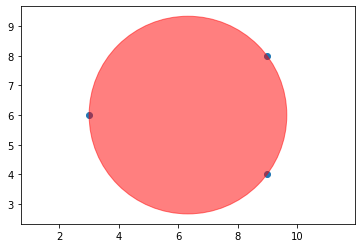

In [22]:
import matplotlib.pyplot as plt

# taken from https://stackoverflow.com/questions/9215658/plot-a-circle-with-pyplot

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((x_0, y_0), r, color='r', alpha=0.5))
ax.scatter(x, y)

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()